Emma Simmons, Last Modified:4/29/21

In [1]:
import math
import numpy as np 
from numpy import log as ln
import matplotlib.pyplot as plt
import pandas as pd

$\textbf{Question 1 Part (a)}$ Solve $u'(t)=1+\frac{u}{t}$, $u(1)=2$. <br> <br>

First, rewrite the differential equation. <br>
$u'-\frac{1}{t}u=1$<br>
Then find the integrating factor.<br>
$\mu(t)=e^{\int-\frac{1}{t}}=e^{-\ln(x)}=e^{\ln(\frac{1}{x})}= \frac{1}{x}$<br>
Multiplying everything by $\mu(t)$, we get <br>
$u'\frac{1}{t}-\frac{1}{t^2}u=\frac{1}{t}$<br>
The left side can be rewritten using the definition of product rule.<br>
$(u\frac{1}{t})'=\frac{1}{t}$<br>
Taking the integral of both sides, <br>
$\int{(u*\frac{1}{t})'dt}=\int{\frac{1}{t}dt}$<br>
$u\frac{1}{t}=\ln{t}+C$<br>
$u(t)=t\ln(t)+Ct$ <br>
Plugging in the initial value $u(1)=2$,<br>
$u(1)=2=1*\ln(1)+C*1$<br>
$C=2$<br>
So, <br>
$u(t)=t\ln(t)+2t$


$\textbf{Question 1 Part (b)}$ Fourth-order Runge Kutta method for $u'(t)=1+\frac{u}{t}$, $u(1)=2, 1\leq t\leq2$

In [2]:
# defines the function f(t,u) for problem 1
# inputs: t is time, u is the variable 
# outputs: the value of f at a given t and u
def f1(t,u):
    return (1+(u/t))

#defines u(t), the exact solution for problem 1 
#input: t is time
#output: returns the value of u at a given t 
def u_exact(t):
    return t*ln(t)+2*t

# defines the fourth order runge kutta method 
# inputs: f is the function, u0 is the initial condition, t0 is the lower bound for t, T is the upper bound for t, 
# k is step size  
# outputs: the  k value and the corresponding error for k 
def RK4(f, u0, t0, T, k):
    N=int(1/k)
    t=np.linspace(t0,T,N+1)
    u=np.zeros(N+1)
    u[0]=u0
    t[0]=t0
    for i in range(N):
        un=u[i]
        tn=t[i]
        K1=f(tn,un)
        K2=f(tn+(1/2)*k,un+(1/2)*k*K1)
        K3=f(tn+(1/2)*k,un+(1/2)*k*K2)
        K4=f(tn+k,un+(k*K3))
        u[i+1]=u[i]+(k/6)*(K1+2*K2+2*K3+K4)
    e=abs(u_exact(t)-u)
    ek=max(e)
    return [k, ek]

In [3]:
k_values=[0.2,0.1,0.05,0.025]
data_RK4=[RK4(f1, 2, 1, 2, k) for k in k_values]
pd.DataFrame(data_RK4, columns=["$k$", "$e_k$"])

,$k$,$e_k$
0,0.200,2.202588e-05
1,0.100,1.474767e-06
2,0.050,9.501746e-08
3,0.025,6.022819e-09


$\textbf{Question 1 Part (c)}$ Second-order Runge Kutta method for $u'(t)=1+\frac{u}{t}$, $u(1)=2, 1\leq t\leq2$

In [4]:
# defines the second order runge kutta method 
# inputs: f is the function, u0 is the initial condition, t0 is the lower bound for t, T is the upper bound for t, 
# k is step size  
# outputs: the  k value and the corresponding error for k 
def RK2(f, u0, t0, T, k):
    N=int(1/k)
    t=np.linspace(t0,T,N+1)
    u=np.zeros(N+1)
    u[0]=u0
    t[0]=t0
    for i in range(N):
        un=u[i]
        tn=t[i]
        K1=f(tn,un)
        K2=f(tn+k,un+k*K1)
        u[i+1]=u[i]+(k/2)*(K1+K2)
    e=abs(u_exact(t)-u)
    ek=max(e)
    return [k, ek]
    
        
        

In [5]:
k_values=[0.2,0.1,0.05,0.025]
data_RK2=[RK2(f1, 2, 1, 2, k) for k in k_values]
pd.DataFrame(data_RK2, columns=["$k$", "$e_k$"])

,$k$,$e_k$
0,0.200,0.008868
1,0.100,0.002356
2,0.050,0.000607
3,0.025,0.000154


$\textbf{Question 2 Part (a)}$ Solving the model problem for the following two-step method.<br><br>
$U^{n+2}-\frac{3}{2}U^{n+1}+\frac{1}{2}U^n=k(\frac{5}{4}f_{n+1}-\frac{3}{4}f_n)$ 

In [6]:
#defines u(t), the exact solution for problem 2 
#input: t is time
#output: returns the value of u at a given t 
def u_exact(t):
    return np.exp(t)

# defines the function f(t,u) for problem 2
# inputs: t is time, u is the variable 
# outputs: the value of f at a given t and u
def f2(t, u):
    return u

# defines the two step method for problem 2, part (a)
# inputs: f is the function, u0 is the initial condition, t0 is the lower bound for t, T is the upper bound for t, 
# k is step size  
# outputs: the vector of u values 
def twostep_1(f, u0, t0, T, k):
    N=int(1/k)
    t=np.linspace(t0, T, N+1)
    u=np.zeros(N+1)
    u[0]=u0
    t[0]=t0
    u[1]=np.exp(k)
    for i in range(N-1):
        u[i+2]=(3/2)*(u[i+1])-(1/2)*u[i]+k*((5/4)*f2(t[i+1], u[i+1])-(3/4)*f2(t[i], u[i]))
    return u

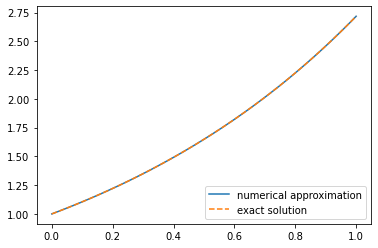

In [7]:
k=0.01
N=int(1/k)
t=np.linspace(0, 1, N+1)
plt.plot(t, twostep_1(f2, 1, 0, 1, 0.01))
plt.plot(t, u_exact(t),linestyle='dashed')
plt.legend(["numerical approximation", "exact solution"], loc ="lower right")
plt.show()

$\textbf{Question 2 Part (b)}$ Solving the model problem for the following two-step method.<br><br> $U^{n+2}-3U^{n+1}+2U^n=k(\frac{1}{2}f_{n+1}-\frac{3}{2}f_n)$

In [8]:
# defines the two step method for problem 2, part (b)
# inputs: f is the function, u0 is the initial condition, t0 is the lower bound for t, T is the upper bound for t, 
# k is step size  
# outputs: the vector of u values 
def twostep_2(f, u0, t0, T, k):
    N=int(1/k)
    t=np.linspace(t0, T, N+1)
    u=np.zeros(N+1)
    u[0]=u0
    t[0]=t0
    u[1]=np.exp(k)
    for i in range(N-1):
        u[i+2]=3*(u[i+1])-2*u[i]+k*((1/2)*f2(t[i+1], u[i+1])-(3/2)*f2(t[i], u[i]))
    return u

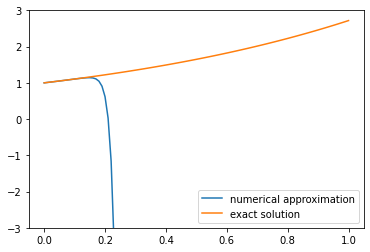

In [9]:
k=0.01
N=int(1/k)
t=np.linspace(0, 1, N+1)
plt.ylim([-3,3])
plt.plot(t, twostep_2(f2, 1, 0, 1, 0.01))
plt.plot(t, u_exact(t))
plt.legend(["numerical approximation", "exact solution"], loc ="lower right")
plt.show()

$\textbf{Question 2 Part (c)}$

In the graph in part (a), the numerical solution and the exact solution are very similar and follow the same line, so we can see that the numerical solution for (a) converges. In part (b), as t gets larger, the numerical and exact solution become very different, with the numerical solution going towards negative infinity, showing that the numerical method in part (b) diverges. We can verify this using zero-stability. <br><br>
First, we will check $U^{n+2}-\frac{3}{2}U^{n+1}+\frac{1}{2}U^n=k(\frac{5}{4}f_{n+1}-\frac{3}{4}f_n)$ is consistent.<br>
For part (a), the characteristic polynomials of $U^{n+2}-\frac{3}{2}U^{n+1}+\frac{1}{2}U^n=k(\frac{5}{4}f_{n+1}-\frac{3}{4}f_n)$ are <br><br>
$\rho(\xi)=\xi^2-\frac{3}{2}\xi+\frac{1}{2}$ and $\sigma(\xi)=\frac{5}{4}\xi-\frac{3}{4}$<br><br>
$\rho(1)=1^2-\frac{3}{2}*1+\frac{1}{2}=-\frac{1}{2}+\frac{1}{2}=0$<br>
$\rho'(1)=2*1-\frac{3}{2}= \frac{1}{2}=\frac{5}{4}*1-\frac{3}{4}=\sigma(1)$<br>
So, the two-step method for part (a) is consistent. <br><br>
$\rho(\xi)=\xi^2-\frac{3}{2}\xi+\frac{1}{2}$ has roots $\xi_1=\frac{1}{2}$ and $\xi_2=1$. <br><br>
Since $\mid \xi_1 \mid =\frac{1}{2} \leq 1$ and $\mid \xi_2 \mid=1 \leq 1$, we know that the two-step method in part (a) is consistent and zero-stable and therefore by Dahlquist Theorem, it converges. <br><br>

For part (b), the characteristic polynomials of $U^{n+2}-3U^{n+1}+2U^n=k(\frac{1}{2}f_{n+1}-\frac{3}{2}f_n)$ are <br><br>
$\rho(\xi)=\xi^2-3\xi+2$ and $\sigma(\xi)=\frac{1}{2}\xi-\frac{3}{2}$<br><br>
$\rho(1)=1^2-3*1+2=0$<br>
$\rho'(1)=2*1-3=-1=\frac{1}{2}*1-\frac{3}{2}=\sigma(1)$<br>
So, the two-step method for part (b) is consistent. <br><br>
$\rho(\xi)=\xi^2-3\xi+2$ has roots $\xi_1=1$ and $\xi_2=2$. <br><br>
Since $\mid \xi_2 \mid=2 > 1$, we know that even though the two-step method in part (b) is consistent, it is not zero-stable, so it will not converge. 